# Dataset Preparation

## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Train Dataset

#### We will use the Titanic dataset (available on Kaggle), where the goal is to predict survival on the Titanic. That is, on the basis of the features (explanatory variables) included in the dataset, we want to predict whether a particular person survived the Titanic shipwreck

In [3]:
titanic = pd.read_csv("/home/anjir29/Desktop/ML_Lab/Titanic (CLR)/data/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Survived: The target variable; whether the person survived the shipwreck (1) or did not survive the shipwreck (0); Pclass: The class the passenger was in on the ship (1, 2 or 3); SibSp: Number of siblings and spouses on the ship; Parch: Number of parents / children on the ship; Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southhampton).

## Drop the features 

In [4]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Create categorical dummies for the embarkment ports

In [5]:
ports = pd.get_dummies(titanic.Embarked, prefix='Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [6]:
titanic = titanic.join(ports)
titanic.drop(['Embarked'], axis=1, inplace=True)

In [7]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,1


## Transform gender names to binaries

In [8]:
titanic.Sex = titanic.Sex.map({'male': 0, 'female': 1})

## Find missing values

In [9]:
titanic[pd.isnull(titanic).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
5,0,3,0,NaN,0,0,8.4583,0,1,0
17,1,2,0,NaN,0,0,13.0000,0,0,1
19,1,3,1,NaN,0,0,7.2250,1,0,0
26,0,3,0,NaN,0,0,7.2250,1,0,0
28,1,3,1,NaN,0,0,7.8792,0,1,0
...,...,...,...,...,...,...,...,...,...,...
859,0,3,0,NaN,0,0,7.2292,1,0,0
863,0,3,1,NaN,8,2,69.5500,0,0,1
868,0,3,0,NaN,0,0,9.5000,0,0,1
878,0,3,0,NaN,0,0,7.8958,0,0,1


## Replace missing values

In [10]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [11]:
titanic[pd.isnull(titanic).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S


## Train and Test Dataset

In [12]:
y = titanic.Survived.copy()
X = titanic.drop(['Survived'], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

## Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

#### Before we predict the test set, we need to apply K-fold validation to the train set Because it ensures that every observation from the original dataset has the chance of appearing in training and test set.

In [16]:
scores = cross_val_score(model, X, y, cv=4) # K = 4
scores

array([0.78026906, 0.81165919, 0.77130045, 0.81981982])

In [17]:
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = pd.Series(model.predict(X_test))

In [19]:
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
acc_log = metrics.accuracy_score(y_test, y_pred)
pre_log = metrics.precision_score(y_test, y_pred)
rec_log = metrics.recall_score(y_test, y_pred)
f1_log = f1_score(y_test, y_pred, average='micro')
cohen_log = cohen_kappa_score(y_test, y_pred)

In [20]:
z.head()

,True,Prediction
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0


In [21]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8026905829596412
Precision: 0.75
Recall: 0.7142857142857143


Text(0.5, 15.0, 'Predicted')

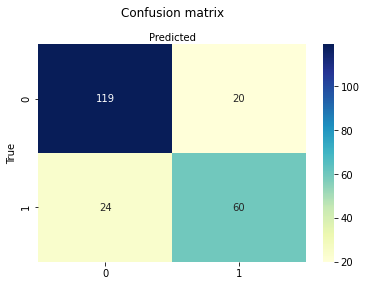

In [22]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Classification KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [25]:
scores = cross_val_score(knn, X, y, cv=4) # K = 4
scores

array([0.6367713 , 0.74439462, 0.67264574, 0.6981982 ])

In [26]:
knn.fit(X_train, y_train)  
y_pred = knn.predict(X_test)

acc_knn = metrics.accuracy_score(y_test, y_pred)
pre_knn = metrics.precision_score(y_test, y_pred)
rec_knn = metrics.recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred, average='micro')
cohen_knn = cohen_kappa_score(y_test, y_pred)

In [27]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7040358744394619
Precision: 0.6153846153846154
Recall: 0.5714285714285714


Text(0.5, 15.0, 'Predicted')

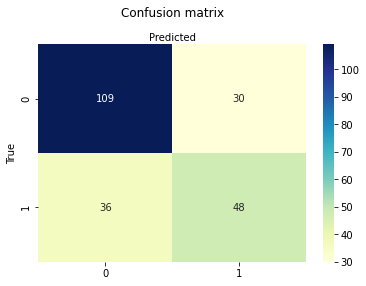

In [28]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Classification SVM

In [29]:
from sklearn.svm import SVC, LinearSVC

In [30]:
linear_svc = LinearSVC()

In [31]:
scores = cross_val_score(linear_svc, X, y, cv=4) # K = 4
scores

array([0.67264574, 0.41255605, 0.76681614, 0.56306306])

In [32]:
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = metrics.accuracy_score(y_test, y_pred)
pre_linear_svc = metrics.precision_score(y_test, y_pred)
rec_linear_svc = metrics.recall_score(y_test, y_pred)
f1_linear_svc = f1_score(y_test, y_pred, average='micro')
cohen_linear_svc = cohen_kappa_score(y_test, y_pred)

In [33]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7847533632286996
Precision: 0.6636363636363637
Recall: 0.8690476190476191


Text(0.5, 15.0, 'Predicted')

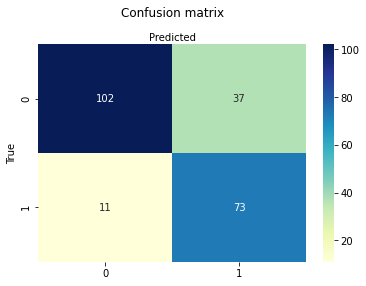

In [34]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Classification Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gaussian = GaussianNB() 

In [37]:
scores = cross_val_score(gaussian, X, y, cv=4) # K = 4
scores

array([0.69058296, 0.78026906, 0.79820628, 0.8018018 ])

In [38]:
gaussian.fit(X_train, y_train)  
y_pred = gaussian.predict(X_test)

acc_gaussian = metrics.accuracy_score(y_test, y_pred)
pre_gaussian = metrics.precision_score(y_test, y_pred)
rec_gaussian = metrics.recall_score(y_test, y_pred)
f1_gaussian = f1_score(y_test, y_pred, average='micro')
cohen_gaussian = cohen_kappa_score(y_test, y_pred)

In [39]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8251121076233184
Precision: 0.7710843373493976
Recall: 0.7619047619047619


Text(0.5, 15.0, 'Predicted')

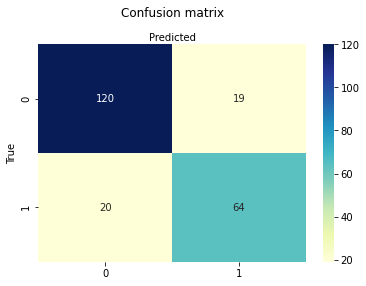

In [40]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Classification Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
decision_tree = DecisionTreeClassifier() 

In [43]:
scores = cross_val_score(decision_tree, X, y, cv=4) # K = 4
scores

array([0.71300448, 0.77578475, 0.78923767, 0.76126126])

In [44]:
decision_tree.fit(X_train, y_train)  
y_pred = decision_tree.predict(X_test)

acc_decision = metrics.accuracy_score(y_test, y_pred)
pre_decision = metrics.precision_score(y_test, y_pred)
rec_decision = metrics.recall_score(y_test, y_pred)
f1_decision = f1_score(y_test, y_pred, average='micro')
cohen_decision = cohen_kappa_score(y_test, y_pred)

In [45]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7982062780269058
Precision: 0.7294117647058823
Recall: 0.7380952380952381


Text(0.5, 15.0, 'Predicted')

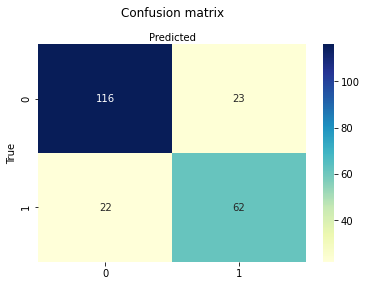

In [46]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Classification Perceptron

In [47]:
from sklearn.linear_model import Perceptron

In [48]:
per = Perceptron(tol=1e-3, random_state=0)

In [49]:
scores = cross_val_score(per, X, y, cv=4) # K = 4
scores

array([0.74439462, 0.78475336, 0.7309417 , 0.72072072])

In [50]:
per.fit(X_train, y_train)  
y_pred = per.predict(X_test)

acc_per = metrics.accuracy_score(y_test, y_pred)
pre_per = metrics.precision_score(y_test, y_pred)
rec_per = metrics.recall_score(y_test, y_pred)
f1_per = f1_score(y_test, y_pred, average='micro')
cohen_per = cohen_kappa_score(y_test, y_pred)

In [51]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7219730941704036
Precision: 0.627906976744186
Recall: 0.6428571428571429


Text(0.5, 15.0, 'Predicted')

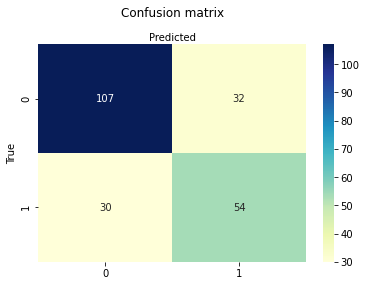

In [52]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Classification Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(max_depth=2, random_state=0)

In [55]:
scores = cross_val_score(rf, X, y, cv=4) # K = 4
scores

array([0.74439462, 0.82511211, 0.78923767, 0.78828829])

In [56]:
rf.fit(X_train, y_train)  
y_pred = rf.predict(X_test)

acc_rf = metrics.accuracy_score(y_test, y_pred)
pre_rf = metrics.precision_score(y_test, y_pred)
rec_rf = metrics.recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred, average='micro')
cohen_rf = cohen_kappa_score(y_test, y_pred)

In [57]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7937219730941704
Precision: 0.7638888888888888
Recall: 0.6547619047619048


Text(0.5, 15.0, 'Predicted')

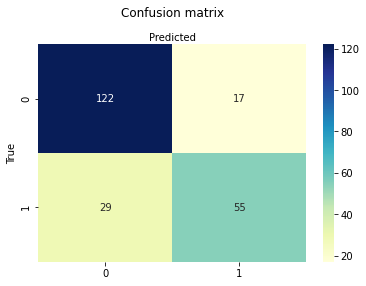

In [58]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Classification Stochastic Gradient Descent

In [59]:
from sklearn.linear_model import SGDClassifier

In [60]:
SGD = SGDClassifier(loss="log", penalty="l1", max_iter=5)

In [61]:
scores = cross_val_score(SGD, X, y, cv=4) # K = 4
scores

array([0.66367713, 0.72197309, 0.77130045, 0.68018018])

In [62]:
SGD.fit(X_train, y_train)  
y_pred = SGD.predict(X_test)

acc_SGD = metrics.accuracy_score(y_test, y_pred)
pre_SGD = metrics.precision_score(y_test, y_pred)
rec_SGD = metrics.recall_score(y_test, y_pred)
f1_SGD = f1_score(y_test, y_pred, average='micro')
cohen_SGD = cohen_kappa_score(y_test, y_pred)

In [63]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.6233183856502242
Precision: 0.0
Recall: 0.0


Text(0.5, 15.0, 'Predicted')

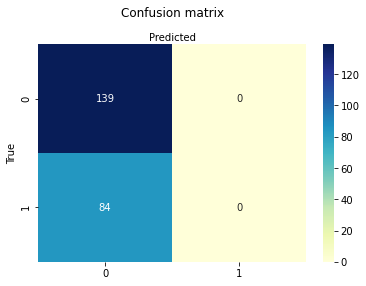

In [64]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Classification Ada Boost

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
AdB = AdaBoostClassifier(n_estimators=100)

In [67]:
scores = cross_val_score(AdB, X, y, cv=4) # K = 4
scores

array([0.76681614, 0.82511211, 0.79372197, 0.82432432])

In [68]:
AdB.fit(X_train, y_train)  
y_pred = SGD.predict(X_test)

acc_AdB = metrics.accuracy_score(y_test, y_pred)
pre_AdB = metrics.precision_score(y_test, y_pred)
rec_AdB = metrics.recall_score(y_test, y_pred)
f1_AdB = f1_score(y_test, y_pred, average='micro')
cohen_AdB = cohen_kappa_score(y_test, y_pred)

In [69]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.6233183856502242
Precision: 0.0
Recall: 0.0


Text(0.5, 15.0, 'Predicted')

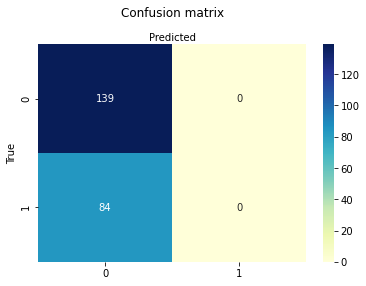

In [70]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Classification Multi layer perceptron

In [71]:
from sklearn.neural_network import MLPClassifier

In [72]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(25, 15), random_state=1)

In [73]:
scores = cross_val_score(mlp, X, y, cv=4) # K = 4
scores

array([0.78026906, 0.79372197, 0.76681614, 0.81081081])

In [74]:
mlp.fit(X_train, y_train)  
y_pred = mlp.predict(X_test)

acc_mlp = metrics.accuracy_score(y_test, y_pred)
pre_mlp = metrics.precision_score(y_test, y_pred)
rec_mlp = metrics.recall_score(y_test, y_pred)
f1_mlp = f1_score(y_test, y_pred, average='micro')
cohen_mlp = cohen_kappa_score(y_test, y_pred)

In [75]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8161434977578476
Precision: 0.7654320987654321
Recall: 0.7380952380952381


Text(0.5, 15.0, 'Predicted')

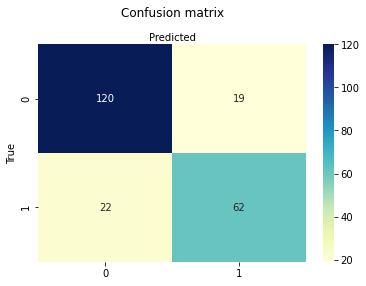

In [76]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

## Result Comparisions

In [77]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Naive Bayes', 
              'Decision Tree','Perceptron', 'Random Forest', 'Stochastic Gradient Descent',
              'Ada Boost','Multi Layer perceptron'],
    
    'Accuracy': [acc_linear_svc, acc_knn, acc_log, 
             acc_gaussian, acc_decision,acc_per,acc_rf,acc_SGD,acc_AdB,acc_mlp],
    
    'Precision': [pre_linear_svc, pre_knn, pre_log, 
             pre_gaussian, pre_decision,pre_per,pre_rf,pre_SGD,pre_AdB,pre_mlp],
    
    'Recall': [rec_linear_svc, rec_knn, rec_log, 
             rec_gaussian, rec_decision,rec_per,rec_rf,rec_SGD,rec_AdB,rec_mlp],
    
    'F1-Score': [f1_linear_svc, f1_knn, f1_log, 
         f1_gaussian, f1_decision,f1_per,f1_rf,f1_SGD,f1_AdB,f1_mlp],
    
    'Cohen Kappa ': [cohen_linear_svc, cohen_knn, cohen_log, 
     cohen_gaussian, cohen_decision,cohen_per,cohen_rf,cohen_SGD,cohen_AdB,cohen_mlp]
})

result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Accuracy')
result_df

,Model,Precision,Recall,F1-Score,Cohen Kappa
Accuracy,,,,,
0.825112,Naive Bayes,0.771084,0.761905,0.825112,0.626690
0.816143,Multi Layer perceptron,0.765432,0.738095,0.816143,0.605684
0.802691,Logistic Regression,0.750000,0.714286,0.802691,0.575826
0.798206,Decision Tree,0.729412,0.738095,0.798206,0.571282
0.793722,Random Forest,0.763889,0.654762,0.793722,0.547946
0.784753,Support Vector Machines,0.663636,0.869048,0.784753,0.568074
0.721973,Perceptron,0.627907,0.642857,0.721973,0.410707
0.704036,KNN,0.615385,0.571429,0.704036,0.360698
0.623318,Stochastic Gradient Descent,0.000000,0.000000,0.623318,0.000000
